# Report Vaccini

## Introduzione

Questo report contiene alcune analisi sulla campagna vaccinale anti COVID-19 in Italia. I dati pubblici sono reperibili su [github](https://github.com/italia/covid19-opendata-vaccini.git), ogni giorno viene eseguito il `pull` della cartella per avere i file aggiornati alla data attuale.

La cartella contiene tabelle in formato `.csv` e `.json`

In [6]:
! ls covid19-opendata-vaccini/*.csv

zsh:1: no matches found: covid19-opendata-vaccini/*.csv


Elenco delle tabelle con descrizione dal `README.md`
*   **consegne-vaccini-latest**: dati sul totale delle consegne giornaliere dei vaccini suddivise per regioni.
*   **vaccini-summary-latest**: dati sul totale delle consegne e somministrazioni avvenute sino ad oggi, includendo la percentuale di dosi somministrate (sul totale delle dosi consegnate) suddivise per regioni.
*   **somministrazioni-vaccini-latest**: dati sulle somministrazioni giornaliere dei vaccini suddivisi per regioni, fasce d'età e categorie di appartenenza dei soggetti vaccinati.
*   **somministrazioni-vaccini-summary-latest**: dati sul totale delle somministrazioni giornaliere per regioni e categorie di appartenenza dei soggetti vaccinati.
*   **punti-somministrazione-latest**: punti di somministrazione per ciascuna Regione e Provincia Autonoma.
*   **anagrafica-vaccini-summary-latest**: totali delle somministrazioni per fasce d'età.

***

Conclude l'intro, l'importazione delle classiche librerie `python` per l'analisi dati

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


# datetime
from datetime import datetime, timedelta

***

## Helping functions

Questa sezione contiene funzioni utili all'esecuzione del codice

In [8]:
# mapping columns names
def createNameMappingDict(df):
    '''This function returns a dictionary which helps mapping columns names in a DataFrame'''
    nameMappingDict = {oldName : oldName.replace('_',' ').title() for oldName in df.columns}
    
    return nameMappingDict

In [9]:
# Pull new files
def pull():
    '''This function executes git pull command'''
    import os
    os.system('git pull')

In [10]:
# Last Update
def lastUpdate():
    '''This function returns last notebook updates'''
    anagraficaVacciniSummary = pd.read_csv('covid19-opendata-vaccini/anagrafica-vaccini-summary-latest.csv')
    datiAggiornati = datetime.strptime(anagraficaVacciniSummary.iloc[0,-1],"%Y-%m-%d").strftime("%d/%m/%Y %H:%M:%S")
    
    print('{0:40s} {1:s}'.format('Ultimo Aggiornamento', datetime.now().strftime("%d/%m/%Y %H:%M:%S")))
    print('{0:40s} {1:s}'.format('Dati aggiornati', datiAggiornati))

***

#### Pull nuovi dati

In [11]:
pull()

*** 

#### Aggiornamento dati

In [12]:
lastUpdate()

FileNotFoundError: [Errno 2] No such file or directory: 'covid19-opendata-vaccini/anagrafica-vaccini-summary-latest.csv'

***
## Indicatori

*La percentuale di vaccinati è pari alla percentuale di persone che hanno ricevuto la seconda dose da almeno 10 giorni.*

Re-run this cell at the end


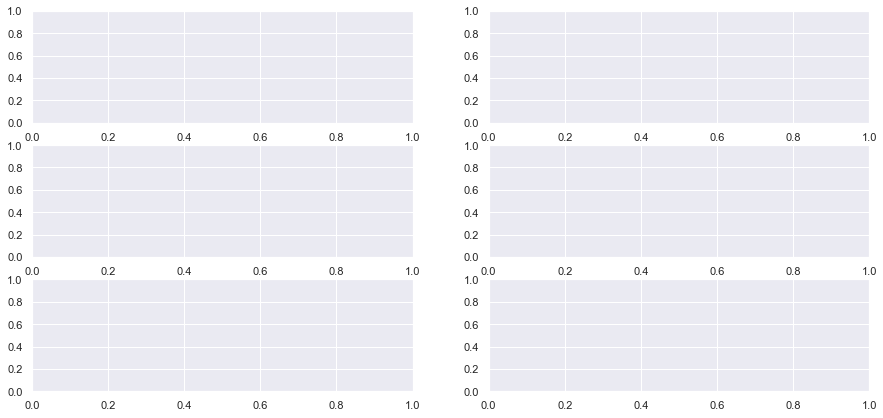

In [13]:
try:
    fig, axs = plt.subplots(3,2, figsize=(15,7))
    axs=axs.ravel()
    KPI = {
            'Dosi Somministrate Totali' : anagraficaùVacciniSummary.Totale.sum(),
            'Ultime Somministrazioni'   : somministrazioniVaccini_data['Numero Dosi Somministrate'][-1],
            'Dosi Consegnate Totali'    : consegneVaccini['Numero Dosi Consegnate'].sum(),
            'Ultime Consegne'           : consegneVaccini_data['Numero Dosi Consegnate'][-1],
            'Prime Dosi'                : anagraficaVacciniSummary['Prima Dose'].sum(),
            'Seconde Dosi'              : anagraficaVacciniSummary['Seconda Dose'].sum(),
 #           '% Vaccinati'               : vaccinatiPerc
        }
    for ax,i in zip(axs,KPI.items()):
        ax.set_facecolor('xkcd:white')
        ax.tick_params(axis='x', colors='w')
        ax.tick_params(axis='y', colors='w')
        ax.text(0.5,0.8,i[0],font='DejaVu Sans',size=20,ha='center',va='center')
        ax.text(0.5,0.5,'{:,}'.format(i[1]),font='DejaVu Sans',size=50,ha='center',va='center')

    plt.tight_layout()
except Exception as e:
    print('Re-run this cell at the end')

 ***

## Report Anagrafica

Il primo report rigurarda la distribuzione di vaccini per età anagrafica. I dati sono presi dal file `anagrafica-vaccini-summary-latest.csv` con l'obiettivo di analizzare la distribuzione di somministrazioni *totali* in funzione della fascia anagrafica, senza distinguere fra prima e seconda somministrazione

In [14]:
anagraficaVacciniSummary = pd.read_csv('covid19-opendata-vaccini/dati/anagrafica-vaccini-summary-latest.csv')

Per aumentare la leggibilità delle colonne eseguo un mapping dei nomi, ripulendoli.

In [15]:
# Generate dictionary to map columns names
nameMappingDict = createNameMappingDict(anagraficaVacciniSummary)

# Rename columns with createNameMappingDict helping function
anagraficaVacciniSummary = anagraficaVacciniSummary.rename(columns=nameMappingDict)

# For better readability I rename particular columns
anagraficaVacciniSummary = anagraficaVacciniSummary.rename(columns={i : i.replace('Categoria','') for i in anagraficaVacciniSummary.columns})

La tabella anagrafica è la seguente. Mostra la suddivisione delle somministrazioni per età anagrafica, suddivise per sesso, categoria di appartenenza e numero di dose somministrata, in cui è stata aggiunta una riga che rappresenta il totale in Italia.

In [16]:
# Create total DataFrame
# totaldf = pd.DataFrame(anagraficaVacciniSummary.sum()).T
# totaldf['Fascia Anagrafica'] = 'Italia'
# totaldf['Ultimo Aggiornamento'] = anagraficaVacciniSummary['Ultimo Aggiornamento'][0]
# anagraficaVacciniSummary = anagraficaVacciniSummary.append(totaldf, ignore_index=True)


anagraficaVacciniSummary

,Fascia Anagrafica,Totale,Sesso Maschile,Sesso Femminile,Operatori Sanitari Sociosanitari,Personale Non Sanitario,Altro,Ospiti Rsa,Over80,Forze Armate,Personale Scolastico,Prima Dose,Seconda Dose,Ultimo Aggiornamento
0,16-19,9797,4730,5067,4171,686,3480,1272,0,62,126,6758,3039,2021-03-26
1,20-29,614252,219137,395115,412694,41336,68444,10485,0,18964,62329,386852,227400,2021-03-26
2,30-39,889830,348404,541426,527482,69504,108632,13196,0,35020,135996,584457,305373,2021-03-26
3,40-49,1198031,420510,777521,610498,108562,159722,19705,0,64684,234860,822539,375492,2021-03-26
4,50-59,1546955,552399,994556,755865,155341,209667,32203,0,87234,306645,1057543,489412,2021-03-26
5,60-69,966599,456741,509858,511809,76749,167614,38654,0,12550,159223,648989,317610,2021-03-26
6,70-79,480330,268061,212269,103605,15564,288468,69808,0,121,2764,382614,97716,2021-03-26
7,80-89,2577771,1103064,1474707,14698,6802,49259,190818,2315615,336,243,1780063,797708,2021-03-26
8,90+,676217,208070,468147,3047,2207,11652,161096,498094,81,40,439898,236319,2021-03-26


I grafici seguenti, in funzione dell'età anagrafica mostrano il numero di somministrazioni effettuate. 
* Il primo mostra le somministrazioni totali per età
* Il secondo è diviso per sesso
* Il terzo è suddiviso in categoria sociale di appartenenza
* Il quarto evidenzia il numero di dosi somministrate

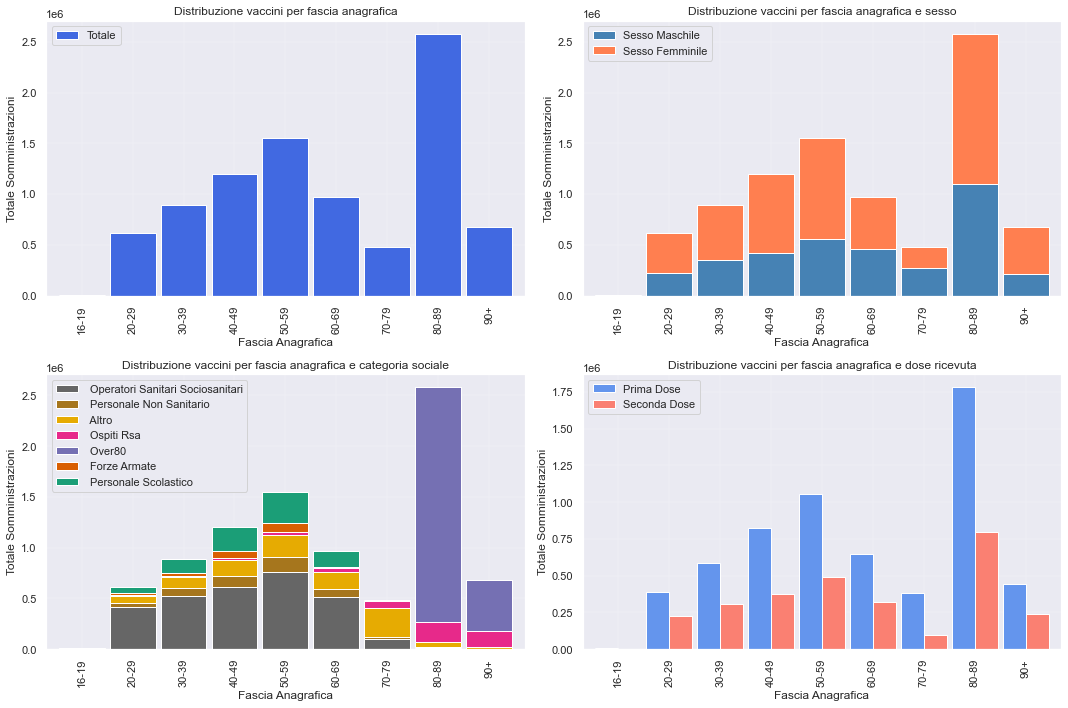

In [36]:
fig, axs = plt.subplots(nrows=2,ncols=2, figsize=(15,10))
axs = axs.ravel()


anagraficaVacciniSummary.plot.bar(x='Fascia Anagrafica', y='Totale',  
                                  title='Distribuzione vaccini per fascia anagrafica',
                                  legend=False,
                                  color='royalblue',
                                  ax=axs[0],
                                  width=.9
                                 )

anagraficaVacciniSummary.plot.bar(x='Fascia Anagrafica', y=['Sesso Maschile', 'Sesso Femminile'],
                                  stacked=True,
                                  title='Distribuzione vaccini per fascia anagrafica e sesso',
                                  ax=axs[1],
                                  color=['steelblue','coral'],
                                  width=.9,
                                 )

anagraficaVacciniSummary.plot.bar(x='Fascia Anagrafica', y= anagraficaVacciniSummary.columns[4:11],
                                  stacked=True,
                                  title='Distribuzione vaccini per fascia anagrafica e categoria sociale',
                                  ax=axs[2],
                                  cmap='Dark2_r',
                                  width=.9
                                 )

anagraficaVacciniSummary.plot.bar(x='Fascia Anagrafica', y=['Prima Dose', 'Seconda Dose'],
                                  stacked=False,
                                  title='Distribuzione vaccini per fascia anagrafica e dose ricevuta',
                                  ax=axs[3],
                                  color=['cornflowerblue','salmon'],
                                  width=.9
                                 )

for i in axs: 
    i.grid(lw=.2)
    i.set_ylabel('Totale Somministrazioni')
    i.legend(loc='upper left')
plt.tight_layout()

***

## Dosi somministrate

Questo report evidenzia la dose somministrata in funzione del tempo. I dati provengono dal file `somministrazioni-vaccini-latest.csv` per analizzare le dosi somministrate quotidianamente a seconda del numero di dose e azienda farmaceutica produttrice.

In [18]:
somministrazioniVaccini = pd.read_csv('covid19-opendata-vaccini/dati/somministrazioni-vaccini-latest.csv')

Anche in questo caso modifico i nomi delle colonne per avere migliore leggibilità

In [19]:
# Generate dictionary to map columns names
nameMappingDict = createNameMappingDict(somministrazioniVaccini)

# Rename columns with createNameMappingDict helping function
somministrazioniVaccini = somministrazioniVaccini.rename(columns=nameMappingDict)

# For better readability I rename particular columns
somministrazioniVaccini = somministrazioniVaccini.rename(columns={i : i.replace('Categoria','') for i in somministrazioniVaccini.columns})

# Convert to datetime the 'Data Somministrazione' column and the reformat in '%Y/%m/%d'
somministrazioniVaccini['Data Somministrazione'] = pd.to_datetime(somministrazioniVaccini['Data Somministrazione']).dt.strftime('%Y/%m/%d')


La tabella risultante è

In [20]:
somministrazioniVaccini.head(10)

,Data Somministrazione,Fornitore,Area,Fascia Anagrafica,Sesso Maschile,Sesso Femminile,Operatori Sanitari Sociosanitari,Personale Non Sanitario,Ospiti Rsa,Over80,Forze Armate,Personale Scolastico,Altro,Prima Dose,Seconda Dose,Codice Nuts1,Codice Nuts2,Codice Regione Istat,Nome Area
0,2020/12/27,Pfizer/BioNTech,ABR,20-29,1,0,1,0,0,0,0,0,0,1,0,ITF,ITF1,13,Abruzzo
1,2020/12/27,Pfizer/BioNTech,ABR,30-39,1,3,4,0,0,0,0,0,0,4,0,ITF,ITF1,13,Abruzzo
2,2020/12/27,Pfizer/BioNTech,ABR,40-49,1,6,7,0,0,0,0,0,0,7,0,ITF,ITF1,13,Abruzzo
3,2020/12/27,Pfizer/BioNTech,ABR,50-59,4,5,9,0,0,0,0,0,0,9,0,ITF,ITF1,13,Abruzzo
4,2020/12/27,Pfizer/BioNTech,ABR,60-69,10,4,13,0,0,0,0,0,1,14,0,ITF,ITF1,13,Abruzzo
5,2020/12/27,Pfizer/BioNTech,ABR,70-79,1,0,0,0,1,0,0,0,0,1,0,ITF,ITF1,13,Abruzzo
6,2020/12/27,Pfizer/BioNTech,ABR,80-89,1,0,0,0,1,0,0,0,0,1,0,ITF,ITF1,13,Abruzzo
7,2020/12/27,Pfizer/BioNTech,BAS,20-29,4,5,9,0,0,0,0,0,0,9,0,ITF,ITF5,17,Basilicata
8,2020/12/27,Pfizer/BioNTech,BAS,30-39,10,18,27,0,0,0,0,0,1,28,0,ITF,ITF5,17,Basilicata
9,2020/12/27,Pfizer/BioNTech,BAS,40-49,7,23,29,0,0,0,0,0,1,30,0,ITF,ITF5,17,Basilicata


e mostra per ogni giorno a partire dal 27 dicembre 2020 il numero di dosi somministrate per regione, azienda fornitrice, sesso e categoria sociale.

### Distribuzione temporale

Il primo grafico mostra il numero di vaccini somministrati diviso in prima o seconda dose.<br> 
Per prima cosa estraggo le colonne interessanti dalla tabella per raggrupparle per giorno di somministrazione.

In [21]:
# Extract relevant columns
somministrazioniVaccini_dosi = somministrazioniVaccini.loc[:,['Data Somministrazione','Fornitore','Prima Dose','Seconda Dose']]

# Group rows by Data, then sum the number of dose
somministrazioniVaccini_dosiGiorno = somministrazioniVaccini_dosi.groupby(by='Data Somministrazione').sum()

Il grafico della dose somministrata quotidiana mostra un elevato numero di prime dosi somministrate a inizio gennaio per poi scemare lasciando il posto alle corrispondenti seconde dosi. Dall'8 febbraio, circa, sono riprese le somministrazioni delle prime dosi.

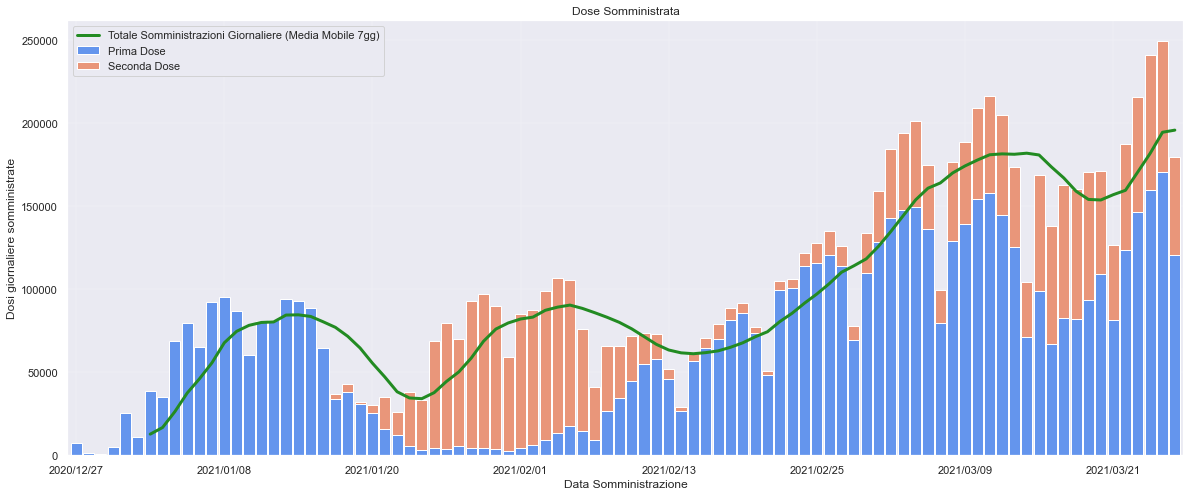

In [22]:
fig, ax = plt.subplots(1,1,figsize=(20,8))
somministrazioniVaccini_dosiGiorno.plot.bar(stacked=True,
                                            title='Dose Somministrata',
                                            ylabel='Dosi giornaliere somministrate',
                                            color=['cornflowerblue','darksalmon'],
                                            width=.9,
                                            rot=0,
                                            ax=ax
                                           )
ax.plot((somministrazioniVaccini_dosiGiorno['Prima Dose'] + somministrazioniVaccini_dosiGiorno['Seconda Dose']).rolling(window=7).mean(),
        lw=3,
        color='forestgreen',
        label='Totale Somministrazioni Giornaliere (Media Mobile 7gg)'
       )

ax.set_xticks(np.arange(0,(plt.xlim()[1]),12))
ax.grid(lw=.2)
ax.legend()

### Distribuzione in funzione del fornitore

La seconda analisi evidenzia in maggior dettaglio quale azienda farmaceutica ha fornito la dose somministrata. Partendo dalla tabella iniziale, estraggo di nuovo le colonne interessanti e le raggruppo per `Data Somministrazione` e `Fornitore` sommando i valori sulle righe. Per evidenziare l'azienda fornitrice, il campo `Fornitore` è stato raggruppato in alto e *unstacked* dalle righe.

In [23]:
# Extract relevant columns
somministrazioniVaccini_fornitore = somministrazioniVaccini.loc[:,['Data Somministrazione','Fornitore','Prima Dose','Seconda Dose']]

#
somministrazioniVaccini_fornitore = somministrazioniVaccini_fornitore.groupby(['Data Somministrazione', 'Fornitore']).sum().unstack(level=1).fillna(0).astype(int)

L'andamento delle vaccinazioni degli ultimi dieci giorni è il seguente:

In [24]:
somministrazioniVaccini_fornitore.tail(10)

Prima Dose                         Seconda Dose  \
Fornitore             AstraZeneca Moderna Pfizer/BioNTech  AstraZeneca   
Data Somministrazione                                                    
2021/03/17                    315    6641           76017            3   
2021/03/18                    163    8552           73655            4   
2021/03/19                  17187    6139           70515           12   
2021/03/20                  47978    6760           54792           65   
2021/03/21                  42448    4216           34759           40   
2021/03/22                  65827    6472           51338           61   
2021/03/23                  74279    8290           63838           39   
2021/03/24                  70692    9419           79622           32   
2021/03/25                  73798   10875           86263           51   
2021/03/26                  48631    7864           64273           34   

                                               
Fornitore             Moderna Pfizer/BioNTech  
Data Somministrazione                          
2021/03/17               4447           75455  
2021/03/18               3989           74206  
2021/03/19               4660           72113  
2021/03/20               5271           56334  
2021/03/21               5118           39984  
2021/03/22               4886           59075  
2021/03/23               4668           64691  
2021/03/24               5001           76403  
2021/03/25               5183           73407  
2021/03/26               3002           55890

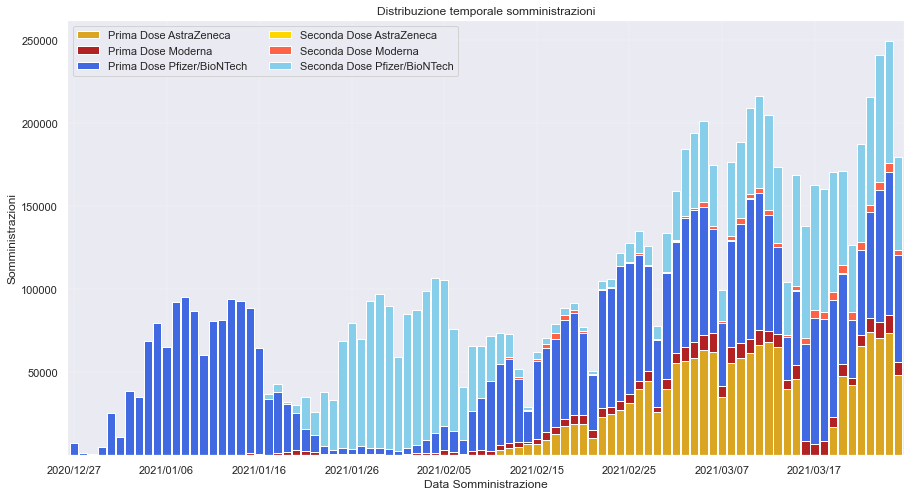

In [25]:
fig, ax = plt.subplots()
somministrazioniVaccini_fornitore.plot.bar(stacked=True,
                                           figsize=(15,8),
                                           ax = ax,
                                           color=['goldenrod','firebrick','royalblue','gold','tomato','skyblue'],
                                           width=.9,
                                           title = 'Distribuzione temporale somministrazioni',
                                           ylabel='Somministrazioni',
                                           rot=0
                                          )

ax.legend([i + ' ' + j for i,j in somministrazioniVaccini_fornitore.keys()],loc='upper left',ncol=2)
ax.grid(lw=.2)

ax.set_xticks(np.arange(0,(ax.get_xlim()[1]),10))


#### Distribuzione dosi Moderna e AstraZeneca

Essendo le dosi di questi fornitori, ancora in numero molto minore a quelle somministrate con il vaccino Pfizer/BioNTech, viene realizzata una versione del grafico precedente per questi due fornitori

In [26]:
somministrazioniVaccini_ModAZ = somministrazioniVaccini_fornitore.drop([('Prima Dose','Pfizer/BioNTech'),
                                                                            ('Seconda Dose', 'Pfizer/BioNTech')]
                                                                            ,axis=1)


somministrazioniVaccini_ModAZ = somministrazioniVaccini_ModAZ[(somministrazioniVaccini_ModAZ!=0).any(1)]

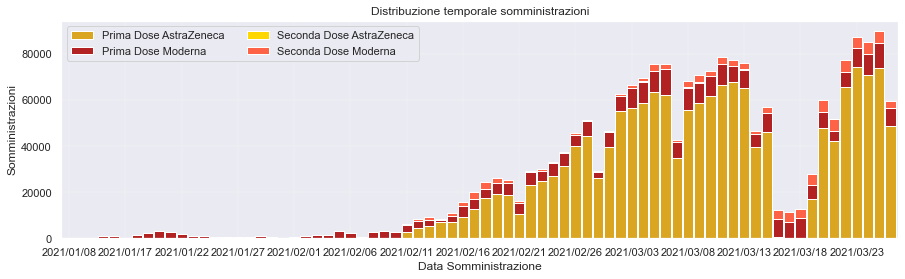

In [27]:
fig, ax = plt.subplots()
somministrazioniVaccini_ModAZ.plot.bar(stacked=True,
                                       figsize=(15,4),
                                       ax = ax,
                                       color=['goldenrod','firebrick','gold','tomato'],
                                       width=.9,
                                       title = 'Distribuzione temporale somministrazioni',
                                       ylabel='Somministrazioni',
                                       rot=0
                                      )

ax.legend([i + ' ' + j for i,j in somministrazioniVaccini_ModAZ.keys()],loc='upper left',ncol=2)
ax.grid(lw=.2)

ax.set_xticks(np.arange(0,(ax.get_xlim()[1]),5))

### Distribuzione in funzione del fornitore e categoria sociale

Questa analisi mostra in funzione dell'azienda fornitrice quali e quanti vaccini vengano somministrati a quale categoria sociale e viceversa a chi sono somministrati i diversi vaccini.<br>
Come al solito estraggo le colonne rilevanti per l'analisi dalla tabella iniziale e le ragggruppo per `Fornitore`.

In [28]:
# Extract columns and group by Fornitore
somministrazioniVaccini_Categoria = somministrazioniVaccini.iloc[:,[1,6,7,8,9,10,11]].groupby('Fornitore').sum()

Quello che si ottiene è questa tabella seguente, che viene analizzata insieme alla sua trasposta. Il primo gurppo di grafici mostra, infatti, quali vaccini siano stati somministrati a seconda della categoria sociale.

In [29]:
somministrazioniVaccini_Categoria

,Operatori Sanitari Sociosanitari,Personale Non Sanitario,Ospiti Rsa,Over80,Forze Armate,Personale Scolastico
Fornitore,,,,,,
AstraZeneca,122341,34066,1686,17569,208606,874604
Moderna,64417,21747,45387,202618,1181,3570
Pfizer/BioNTech,2757111,420938,490164,2593522,9265,24052


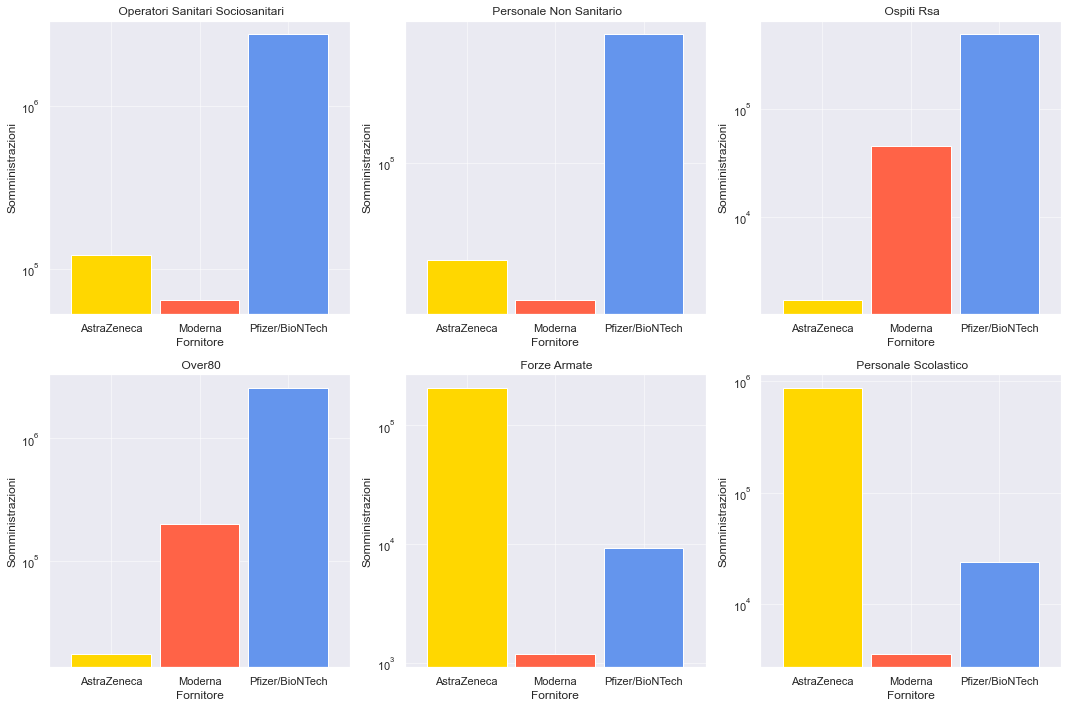

In [30]:
fig, axs = plt.subplots(2,3,figsize=(15,10))
axs = axs.ravel()

for i in range(somministrazioniVaccini_Categoria.keys().size):
    somministrazioniVaccini_Categoria.plot.bar(y=somministrazioniVaccini_Categoria.keys()[i],
                                               ax=axs[i],
                                               legend=False,
                                               ylabel='Somministrazioni',
                                               title=somministrazioniVaccini_Categoria.keys()[i],
                                               width=.9,
                                               color=['gold','tomato','cornflowerblue'],
                                               logy=True,
                                               rot=0
                                              )
for i in axs: 
    i.grid(lw=.5)
plt.tight_layout()                                                  


L'analisi successiva viene effettuata per `Fornitore` per evidenziare la destinazione dei propri vaccini. Il vaccino di AstraZeneca non viene, infatti, utilizzato per le categorie `Over80` e `Ospiti RSA`.

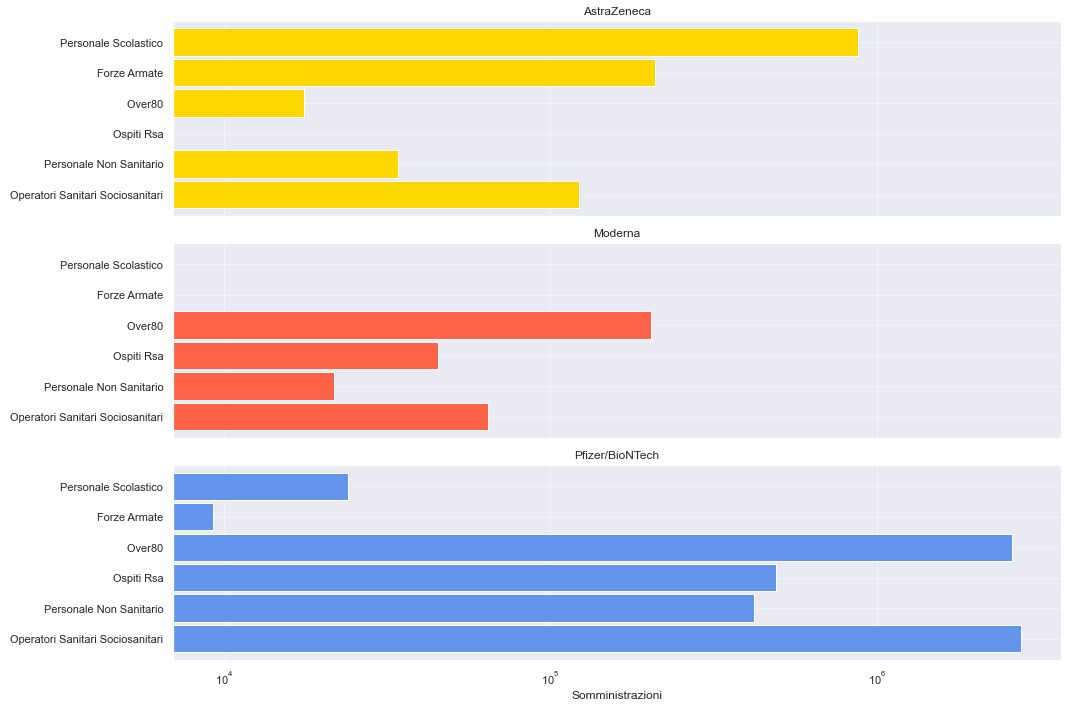

In [31]:
ax=somministrazioniVaccini_Categoria.T.plot.barh(subplots=True,
                                                 figsize=(15,10),
                                                 width=.9,
                                                 legend=False,
                                                 logx=True,
                                                 color=['gold','tomato','cornflowerblue'],
                                                )
ax[-1].set_xlabel('Somministrazioni')
for i in ax: 
    i.grid(lw=.5)
plt.tight_layout()

***

## Analisi Regionale

Questa analisi prende in considerazione le somministrazioni nelle regioni italiane per mettere in luce le differenze della campagna vaccinale.<br>
Il file utilizzato è ancora `somministrazioni-vaccini-latest.csv` e la relativa tabella estratta. In questo caso, però, per valutare le differenze regionali è stato fatto un raggruppamento in base alla regione.

In [32]:
# Group rows and drop numeric filed Codice Regione Istat
somministrazioniVaccini_regione = somministrazioniVaccini.groupby('Nome Area').sum().drop('Codice Regione Istat', axis=1)

# Rename index to simplify naming
somministrazioniVaccini_regione = somministrazioniVaccini_regione.rename_axis('Regione')

La tabella ottenuta è la seguente

In [33]:
somministrazioniVaccini_regione

,Sesso Maschile,Sesso Femminile,Operatori Sanitari Sociosanitari,Personale Non Sanitario,Ospiti Rsa,Over80,Forze Armate,Personale Scolastico,Altro,Prima Dose,Seconda Dose
Regione,,,,,,,,,,,
Abruzzo,78521,120185,60211,1528,7493,74074,6974,25721,22705,140083,58623
Basilicata,34739,45864,21754,4806,4347,37477,2862,5260,4097,49439,31164
Calabria,111786,118264,75452,2337,17038,60557,10562,9859,54245,157793,72257
Campania,329073,419358,183750,34825,13329,232526,13793,127300,142908,512895,235536
Emilia-Romagna,283990,483205,257116,25068,47326,280229,11331,64997,81128,499157,268038
Friuli-Venezia Giulia,76389,123630,63848,13220,14446,69228,5451,19209,14617,126175,73844
Lazio,381392,538572,305038,16091,36492,326961,34057,100791,100534,653153,266811
Liguria,104025,148600,84120,9867,19256,97986,5775,8157,27464,165123,87502
Lombardia,519714,916264,500948,159523,109560,421337,31625,128235,84750,982874,453104


La prima analisi riguarda il numero assoluto di somministrazioni in prima e seconda dose nelle regioni. Questo risultato è ordinato per numero di persone alle quali è stata somministrata la seconda dose. Correla ovviamente con la popolazione regionale.

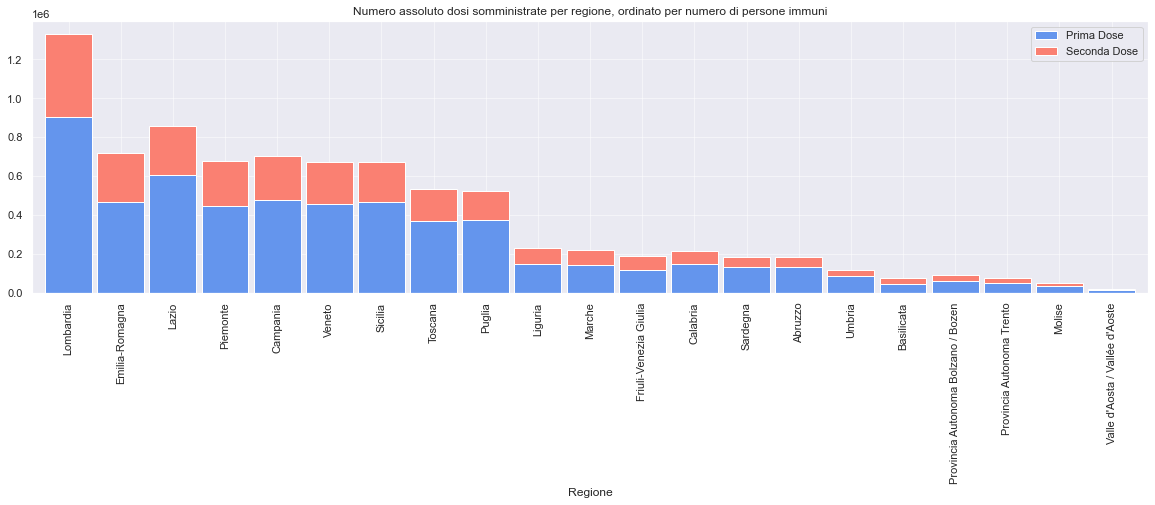

In [59]:
somministrazioniVaccini_regione.sort_values('Seconda Dose', ascending=False).plot.bar(y=['Prima Dose','Seconda Dose'],
                                                                                      stacked=True,
                                                                                      width=.9,
                                                                                      figsize=(20,5),
                                                                                      color=['cornflowerblue','salmon'],
                                                                                      title='Numero assoluto dosi somministrate per regione, ordinato per numero di persone immuni'     
                                                                                     )
plt.grid(lw=.5)

Un risultato più affidabile implementa anche il numero di abitanti di ciascuna regione per valutare i vaccinati percentuali. Per farlo mi servo del database [ISTAT](http://dati.istat.it/Index.aspx?DataSetCode=DCIS_POPRES1) della popolazione residente al 1° gennaio 2021, opportunamente trasformato e ripulito dei campi inutili.

In [61]:
regioni = pd.read_csv('DCIS_POPRES1_25022021122609782.csv')
regioni = regioni.iloc[:,[1,5,6,9,12]].sort_values(['Territorio',
                                                    'Sesso']
                                                  ).where((regioni['Stato civile']=='totale') &
                                                          (regioni.Sesso=='totale') &
                                                          (regioni.ETA1=='TOTAL')
                                                         ).dropna().iloc[:,[0,-1]].set_index('Territorio')
# Rename field and indexfor better naming
regioni = regioni.rename(columns={'Value': 'Abitanti'}).rename_axis('Regione').astype(int)

Quindi introduco i dati caricati nella tabella di report dei vaccini somministrati per regioni con un `(inner) join`, questo ha semplificato il codice nell'evitare di chiamare la funzione `drop` per i campi non regionali.

In [62]:
somministrazioniVaccini_regione = somministrazioniVaccini_regione.join(regioni)

Per valutare le vaccinazioni percentuali si introducono due colonne calcolate. Poi vengono eliminati tutti i campi non necessari.

In [63]:
# Evaluate percentage of Prima and Seconda Dose
somministrazioniVaccini_regione['% Prima Dose'] = 100 * somministrazioniVaccini_regione['Prima Dose']/somministrazioniVaccini_regione.Abitanti
somministrazioniVaccini_regione['% Seconda Dose'] = 100 * somministrazioniVaccini_regione['Seconda Dose']/somministrazioniVaccini_regione.Abitanti

# Drop useless fields
somministrazioniVaccini_regione_percentuale = somministrazioniVaccini_regione.iloc[:,-3:]

Infine, la tabella finale trasformata e pulita è la seguente

In [64]:
somministrazioniVaccini_regione_percentuale

,Abitanti,% Prima Dose,% Seconda Dose
Regione,,,
Abruzzo,1293941,10.237870,4.127623
Basilicata,553254,8.577073,5.568328
Calabria,1894110,7.849650,3.463368
Campania,5712143,8.325212,3.972572
Emilia-Romagna,4464119,10.437177,5.644137
Friuli-Venezia Giulia,1206216,9.921523,5.756763
Lazio,5755700,10.499505,4.375228
Liguria,1524826,9.918968,5.188526
Lombardia,10027602,9.044186,4.225946


Il risultato mostrato nel grafico ordinato, evidenzia un modo più corretto di valutare il numero di vaccinati regionali.

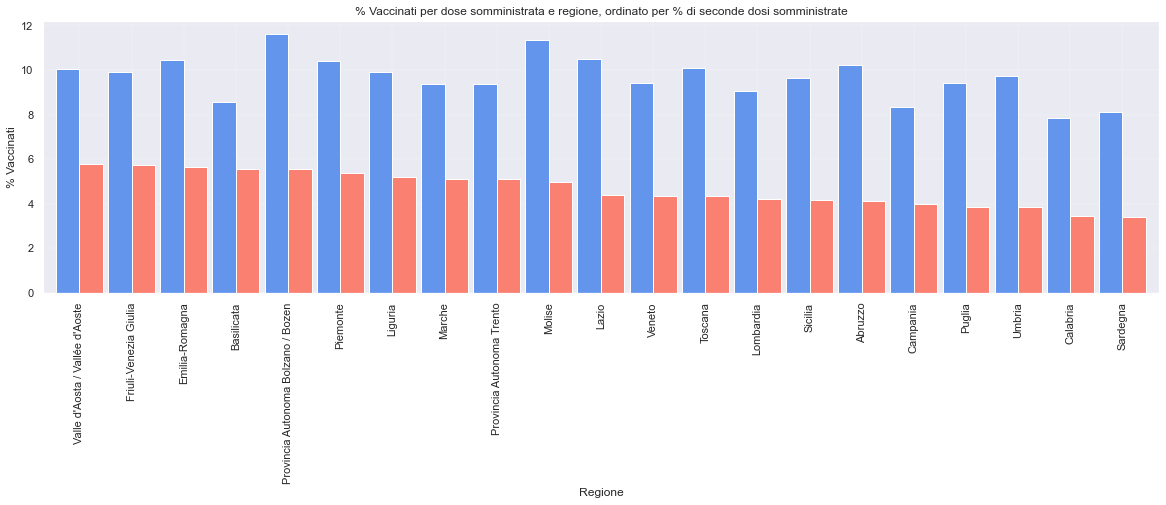

In [65]:
fig, axs = plt.subplots(1,1,figsize=(20,5))

somministrazioniVaccini_regione_percentuale_sorted = somministrazioniVaccini_regione_percentuale.sort_values('% Seconda Dose', ascending=False)

somministrazioniVaccini_regione_percentuale_sorted.plot.bar(y=['% Prima Dose','% Seconda Dose'],
                                                            stacked=False,
                                                            width=.9,
                                                            ylabel='% Vaccinati',
                                                            title='% Vaccinati per dose somministrata e regione, ordinato per % di seconde dosi somministrate',
                                                            ax=axs,
                                                            color=['cornflowerblue','salmon'],
                                                            legend=False
                                                           )
axs.grid(lw=.2)

***

## Andamento temporale di consegne e somministrazioni

Questa analisi valuta l'andamento temporale di consegne e somministrazioni dei vaccini. Il file di provenienza dei dati è `consegne-vaccini-latest.csv`.

In [67]:
consegneVaccini = pd.read_csv('covid19-opendata-vaccini/dati/consegne-vaccini-latest.csv')

# Rename columns with created dictionary
consegneVaccini.rename(columns=createNameMappingDict(consegneVaccini),inplace=True)

# Rename columns for better naming
betterNamingDict = {'Nome Area': 'Regione', 
                    'Numero Dosi': 'Numero Dosi Consegnate'
                   }
consegneVaccini = consegneVaccini.rename(columns=betterNamingDict)

# Drop useless fields
consegneVaccini = consegneVaccini.drop(['Area','Codice Nuts1', 'Codice Nuts2','Codice Regione Istat'], axis=1)

#Convert to datetime
consegneVaccini['Data Consegna'] = pd.to_datetime(consegneVaccini['Data Consegna']).dt.strftime('%Y/%m/%d')

Si ottiene la seguente tabella con i dati ripuliti, di cui ne vengono riportate le prime 10 righe

In [68]:
consegneVaccini.tail(10)

,Fornitore,Numero Dosi Consegnate,Data Consegna,Regione
607,AstraZeneca,41300,2021/02/20,Veneto
608,Pfizer/BioNTech,50310,2021/02/23,Veneto
609,AstraZeneca,37300,2021/02/27,Veneto
610,Moderna,19700,2021/02/28,Veneto
611,Pfizer/BioNTech,52650,2021/03/02,Veneto
612,Pfizer/BioNTech,56160,2021/03/09,Veneto
613,AstraZeneca,56000,2021/03/10,Veneto
614,AstraZeneca,20900,2021/03/13,Veneto
615,Pfizer/BioNTech,56160,2021/03/15,Veneto
616,Moderna,26500,2021/03/22,Veneto


In [69]:
consegneVaccini[consegneVaccini.Regione=='Lombardia'].groupby('Data Consegna').sum().sum()

Numero Dosi Consegnate    1627370
dtype: int64

### Distribuzione consegne in funzione del tempo

La prima analisi riguarda le consegne di vaccini dalle case farmaceutiche confrontate con le somministrazioni quotidiane. Per farlo si mettono in `join` le tabelle di consegne e somministrazioni (già caricata).

In [70]:
# Group data by Data Consegna
consegneVaccini_data = consegneVaccini.groupby(['Data Consegna']).sum().fillna(0)

# Rename index field for join
consegneVaccini_data = consegneVaccini_data.rename_axis('Data')

# Make a cumulative sum column
consegneVaccini_data_cumulative = consegneVaccini_data.cumsum()

In [71]:
# Get relevant columns from somministrazioni
somministrazioniVaccini_data = somministrazioniVaccini.iloc[:,[0,4,5]]

# Group by data somministrazione
somministrazioniVaccini_data = somministrazioniVaccini_data.groupby('Data Somministrazione').sum()

# Sum columns to get total value
somministrazioniVaccini_data['Numero Dosi Somministrate'] = somministrazioniVaccini_data['Sesso Maschile'] + somministrazioniVaccini_data['Sesso Femminile']

# Drop columns that are useless now
somministrazioniVaccini_data.drop(['Sesso Maschile','Sesso Femminile'],axis=1, inplace=True)

# Rename index field for join
somministrazioniVaccini_data = somministrazioniVaccini_data.rename_axis('Data')

# Make a cumulative sum column
somministrazioniVaccini_data_cumulative = somministrazioniVaccini_data.cumsum()

In [72]:
# join tables
somministrazioni_consegne = somministrazioniVaccini_data_cumulative.join(consegneVaccini_data_cumulative).fillna(method='ffill')

# make a % column of data
somministrazioni_consegne['% Somministrazioni'] = somministrazioni_consegne['Numero Dosi Somministrate'] / somministrazioni_consegne['Numero Dosi Consegnate'] * 100

# SMA column
somministrazioni_consegne['% Somministrazioni (SMA)'] = somministrazioni_consegne['% Somministrazioni'].rolling(window=7).mean()

La tabella in analisi è la seguente.

In [73]:
somministrazioni_consegne.tail(10)

,Numero Dosi Somministrate,Numero Dosi Consegnate,% Somministrazioni,% Somministrazioni (SMA)
Data,,,,
2021/03/15,6945597,9577500.0,72.519937,73.982258
2021/03/16,7083684,9577500.0,73.961723,73.943290
2021/03/17,7246079,9577500.0,75.657311,74.644120
2021/03/18,7405671,9577500.0,77.323634,75.228886
2021/03/19,7574794,9577500.0,79.089470,75.726886
2021/03/20,7744871,9577500.0,80.865268,76.538706
2021/03/21,7870888,9678000.0,81.327630,77.249282
2021/03/22,8057197,9911100.0,81.294680,78.502816
2021/03/23,8267677,9911100.0,83.418359,79.853764


Il prossimo grafico mostra contemporaneamente il numero di dosi consegnate, somministrate e la percentuale di dosi somministrate su quelle consengnate, in tutta Italia.

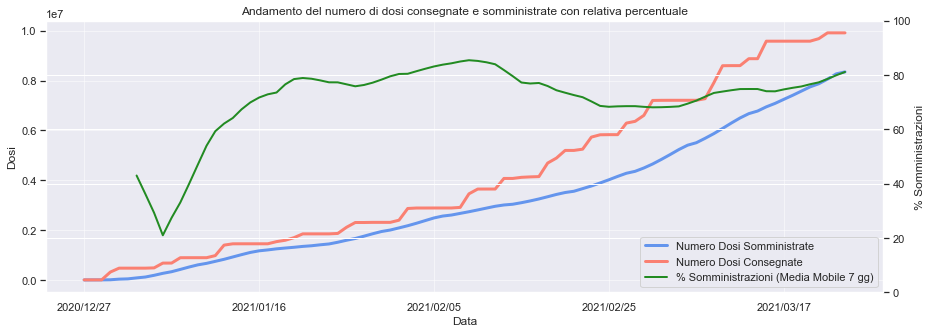

In [74]:
fig,ax = plt.subplots(1,1,figsize=(15,10))

somministrazioni_consegne.plot(y=['Numero Dosi Somministrate','Numero Dosi Consegnate'], 
                               figsize=(15,5), 
                               lw=3, 
                               ax=ax,
                               ylabel='Dosi',
                               color=['cornflowerblue','salmon'],
                               legend=False,
                               title='Andamento del numero di dosi consegnate e somministrate con relativa percentuale'
                              )

somministrazioni_consegne.plot(y=['% Somministrazioni (SMA)'], 
                               secondary_y=True,
                               ax=ax, 
                               lw=2,
                               color=['forestgreen'],
                               label=['% Somministrazioni (Media Mobile 7 gg)'],
                               legend=False
                              )
ax.grid(lw=.5)

ax.right_ax.set_ylabel('% Somministrazioni')
ax.right_ax.set_ylim([0,100])

handles,labels = [],[]
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

plt.legend(handles,labels, loc='lower right')
        


In [75]:
def movingAverage(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

***

## Rapporto fra dosi disponibili e utilizzate per regione

Questa sezione analizza la campagna vaccinale regionale dal punto di vista dell'utilizzo delle dosi in base a quelle fornite.<br>
La prima parte vuole mettere in evidenza il numero di dosi consegnate a ciascuna regione in rapporto ai suoi abitanti e il rapporto tra numero di dosi somministrate e numero di abitanti, mostrando anche le regioni che hanno somministrato le dosi maggiori in rapporto a quelle consegnate. 

La seconda parte analizza quali dosi siano lasciate insomministrate.

### Report dosi somministrate e consegnate

In [76]:
consegneSomministrazioniVacciniRegioni = consegneVaccini.groupby('Regione').sum().join(regioni)

consegneSomministrazioniVacciniRegioni['% Dosi Consegnate/Abitanti'] = 100 * consegneSomministrazioniVacciniRegioni['Numero Dosi Consegnate']/consegneSomministrazioniVacciniRegioni['Abitanti']

dosiTotali = consegneSomministrazioniVacciniRegioni['Numero Dosi Consegnate'].sum()

In [77]:
somministrazioneVacciniRegione = pd.DataFrame(somministrazioniVaccini.groupby('Nome Area').sum().iloc[:,:2].sum(axis=1), columns=['Numero Dosi Somministrate'])

consegneSomministrazioniVacciniRegioni = consegneSomministrazioniVacciniRegioni.join(somministrazioneVacciniRegione)

consegneSomministrazioniVacciniRegioni['% Dosi Somministrate/Abitanti'] = 100 * consegneSomministrazioniVacciniRegioni['Numero Dosi Somministrate'] / consegneSomministrazioniVacciniRegioni['Abitanti']

In [78]:
consegneSomministrazioniVacciniRegioni

,Numero Dosi Consegnate,Abitanti,% Dosi Consegnate/Abitanti,Numero Dosi Somministrate,% Dosi Somministrate/Abitanti
Regione,,,,,
Abruzzo,211000,1293941,16.306771,185881,14.365493
Basilicata,95035,553254,17.177463,78260,14.145402
Calabria,293260,1894110,15.482733,214281,11.313018
Campania,794595,5712143,13.910629,702467,12.297784
Emilia-Romagna,824840,4464119,18.477106,717889,16.081314
Friuli-Venezia Giulia,228875,1206216,18.974628,189114,15.678286
Lazio,981310,5755700,17.049360,856145,14.874733
Liguria,312420,1524826,20.488895,230363,15.107494
Lombardia,1627370,10027602,16.228905,1330676,13.270132


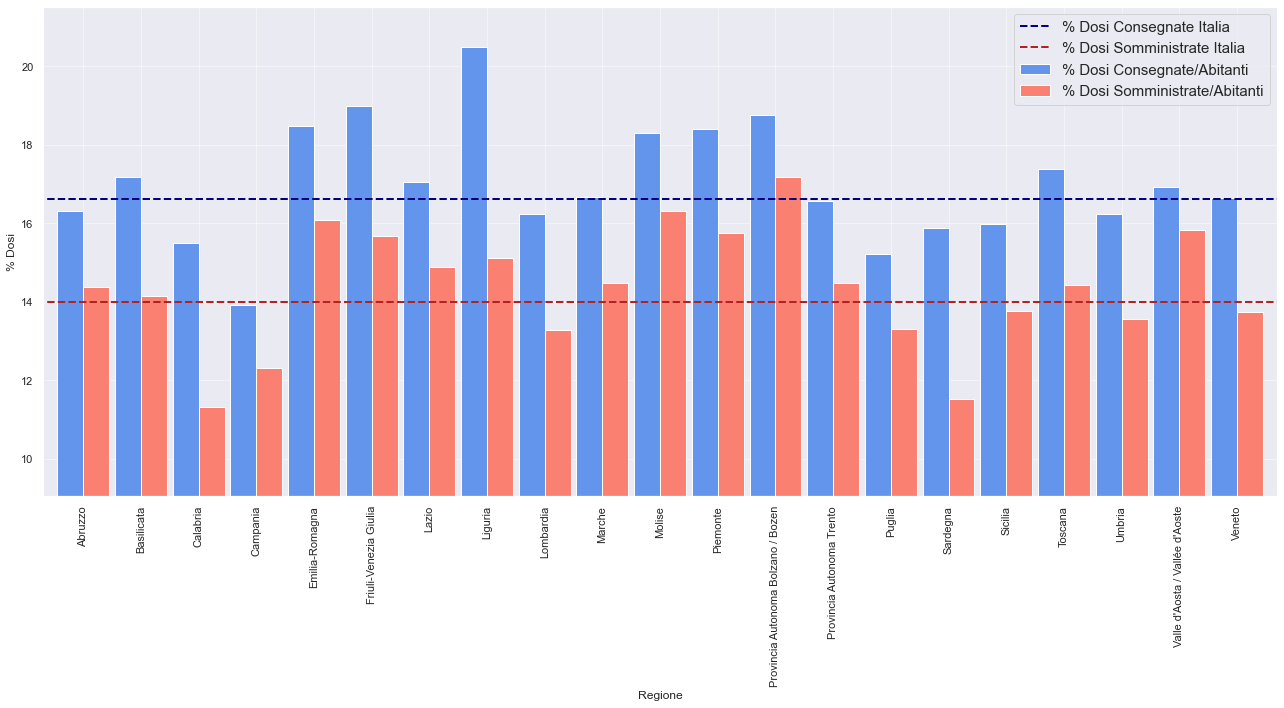

In [95]:
fig, ax = plt.subplots(1,1,figsize=(18,10))

consegneSomministrazioniVacciniRegioni.plot.bar(y=['% Dosi Consegnate/Abitanti',
                                                   '% Dosi Somministrate/Abitanti'
                                                  ],
                                                stacked=False,
                                                legend=False,
                                                color=['cornflowerblue','salmon'],
                                                ax=ax,
                                                width=.9,
                                                ylabel='% Dosi'
                                               )
dosiConsegnateItalia = 100 * consegneSomministrazioniVacciniRegioni['Numero Dosi Consegnate'].sum()
dosiSomministrateItalia = 100 *consegneSomministrazioniVacciniRegioni['Numero Dosi Somministrate'].sum()

ax.hlines(xmin=-1,xmax=30,y=dosiConsegnateItalia/regioni.loc['Italia'],ls='--',lw=2,color='navy', label='% Dosi Consegnate Italia')
ax.hlines(xmin=-1,xmax=30,y=dosiSomministrateItalia/regioni.loc['Italia'],ls='--',lw=2,color='firebrick', label='% Dosi Somministrate Italia')
#ax.legend(loc='best')

#ax1=ax.twinx()
#ax1.scatter(x=consegneSomministrazioniVacciniRegioni.index,
#            y=100 * consegneSomministrazioniVacciniRegioni['% Dosi Somministrate/Abitanti']/consegneSomministrazioniVacciniRegioni['% Dosi Consegnate/Abitanti'],
#            color='forestgreen',
#            s=150, 
#            marker='s',
#            label=' % Dosi Somministrate/Dosi Consegnate'
#           )
#ax1.set_ylabel('% Dosi Somministrate/Dosi Consegnate')

h1, l1 = ax.get_legend_handles_labels()
#h2, l2 = ax1.get_legend_handles_labels()
#ax1.legend(h1+h2,l1+l2,loc='best')
ax.legend(fontsize=15)
ax.grid(lw=.5)
ax.set_ylim([.8  * min(consegneSomministrazioniVacciniRegioni['% Dosi Somministrate/Abitanti']),
             1.05 * max(consegneSomministrazioniVacciniRegioni['% Dosi Consegnate/Abitanti']) ])
plt.tight_layout()

### Report dosi insomministrate (work in progress)

In [86]:
dosiConsegnate = consegneVaccini.groupby(['Fornitore','Regione']).sum().unstack()

#dosiSomministrate = pd.DataFrame(
somministrazioniVaccini.iloc[:,[1,4,5,-1]].rename(columns={'Nome Area': 'Regione'}).groupby(['Fornitore','Regione']).unstack()#,columns=['Numero Dosi Somministrate']

dosiSomministrate


AttributeError: 'DataFrameGroupBy' object has no attribute 'unstack'

In [ ]:
somministrazioniVaccini_regione_fornitore = pd.DataFrame(somministrazioniVaccini.iloc[:,[1,4,5,-1]].rename(columns={'Nome Area': 'Regione'}).groupby(['Regione','Fornitore']).sum().sum(axis=1), columns=['Numero Dosi Somministrate']).unstack().fillna(0).astype(int)



In [ ]:
consegneSomministrazioni_regione_fornitore = consegneVaccini_regione_fornitore.join(somministrazioniVaccini_regione_fornitore)

In [ ]:
consegneSomministrazioni_regione_fornitore.T.swaplevel()[ 

In [ ]:
fig, axs = plt.subplots(ncols=3, nrows=7, figsize=(20,35))
axs = axs.ravel()

for nax,ax in enumerate(axs):
    consegneSomministrazioni_regione_fornitore.T.iloc[:,nax].plot.bar(ax=ax)
    

In [ ]:
consegneSomministrazioni_regione_fornitore.T.iloc[:,0]

***
***

## Sezione provvisoria

Provo a definire una "efficienza di vaccinazione" come $$\epsilon = 1 - \frac{\text{Attendenti $2^a$ dose}}{\text{Dosi rimanenti}}.$$

In questo modo:
* chi ha poche persone che aspettano e poche dosi è efficiente
* chi ha poche persone e molte dosi è meno efficiente
* chi ha più persone che dosi è inefficiente (efficienza negativa)

In [ ]:
consegneVacciniTotale = consegneVaccini.groupby('Regione').sum()
somministrazioniVacciniTotale = pd.DataFrame(somministrazioniVaccini.rename(columns={'Nome Area' : 'Regione'}).groupby('Regione').sum().iloc[:,:2].sum(axis=1), columns=['Numero Dosi Somministrate'])


In [ ]:
reportDosiRegione = somministrazioniVacciniTotale.join([consegneVacciniTotale,somministrazioniVaccini_regione.loc[:,['Seconda Dose', 'Prima Dose']]])

In [ ]:
reportDosiRegione['Numero Dosi Rimanenti'] = reportDosiRegione['Numero Dosi Consegnate'] - reportDosiRegione['Numero Dosi Somministrate']
reportDosiRegione['Numero Pazienti Rimanenti'] = reportDosiRegione['Prima Dose'] - reportDosiRegione['Seconda Dose']

reportDosiRegione['Efficienza'] = 1 - reportDosiRegione['Numero Pazienti Rimanenti']/reportDosiRegione['Numero Dosi Rimanenti']

In [ ]:
reportDosiRegione['Efficienza'].sort_values(ascending=True).plot.barh(figsize=(5,10))

In [ ]:
reportDosiRegione

### Experimental